# Observe behavior before and during a light pulse

In [27]:
import load_data as ld
import helpers as hp
import nan_imputation as ni
import light_pusle as lp
import os
import pandas as pd
import numpy as np

In [28]:
# Load data
repo_root = hp.find_repo_root()
optogenetics_path = os.path.join(repo_root, 'Data', 'Optogenetics')
opto_data = ld.load_optogenetics(optogenetics_path)

In [29]:
# Remove rows with NaN values
rows_to_check = slice(2, 4)
cut_nan_dict = {name: ni.cut_array(array, rows_to_check) for name, array in opto_data.items()}

Processing worm_1...
Found 40 light pulses for worm_1.
    Pulse_Start  Pulse_End  Speed_Before  Speed_During  Changed_Pixels_Before  \
0        6011.0     6018.0      1.116032      0.930787              18.966667   
1        9609.0     9616.0      1.396224      1.606727              21.388889   
2         608.0      615.0      3.581943      1.668477              26.121739   
3        2407.0     2414.0      2.204061      1.746784              35.626087   
4        4206.0     4213.0      4.166710      4.202111              54.420561   
5        6005.0     6012.0      1.160022      1.182983              20.516667   
6        7804.0     7811.0      2.739540      3.181540              36.230000   
7        9603.0     9610.0      1.278703      1.527871              21.411111   
8         602.0      609.0      3.448157      1.199613              24.641026   
9        2401.0     2408.0      1.743732      2.494807              31.045872   
10       4200.0     4207.0      4.517322      2.711148

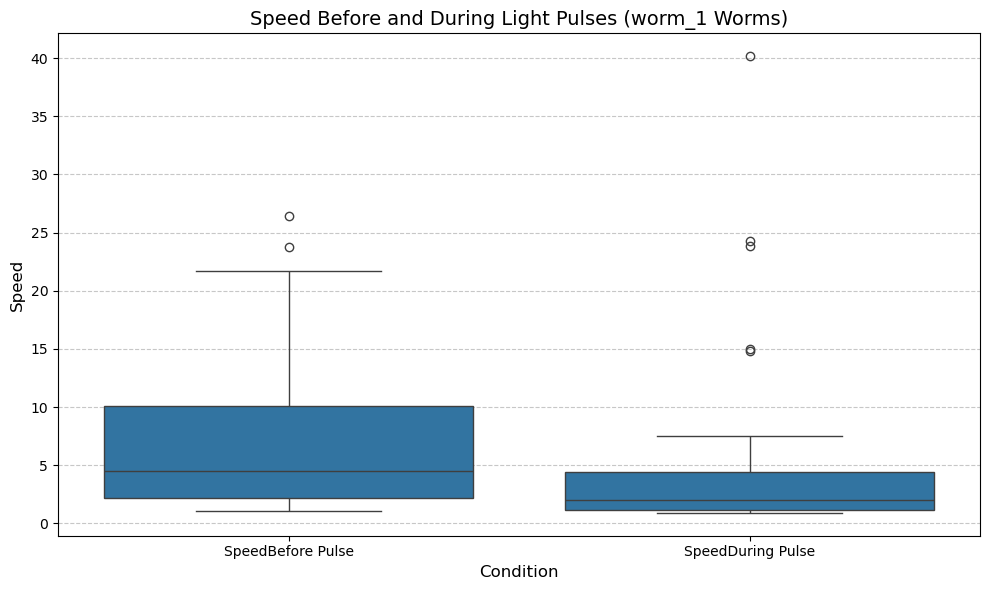

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Changed Pixels_Before', 'Changed Pixels_During']"

In [30]:
# Process each worm in `cut_nan_dict`
for worm_name, worm_array in cut_nan_dict.items():
    print(f"Processing {worm_name}...")
    
    # Convert NumPy array to DataFrame
    worm_df = pd.DataFrame(
        worm_array.T, 
        columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Light_Pulse', 'Category']
    )
    
    # Detect light pulses
    light_pulses = lp.detect_light_pulses(worm_df, pulse_column='Light_Pulse', pulse_length_min=8, pulse_length_max=15)
    if light_pulses:
        print(f"Found {len(light_pulses)} light pulses for {worm_name}.")
        
        # Compare behavior before and during light pulses
        behavior_comparisons = lp.compare_behavior_before_during(worm_df, light_pulses)
        print(behavior_comparisons)
        
        # Visualize changes (Speed and Changed Pixels)
        for feature in ['Speed', 'Changed Pixels']:
            lp.plot_behavior_changes(behavior_comparisons, feature, worm_name)
    else:
        print(f"No valid light pulses detected for {worm_name}.")